In [15]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "E:\spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at <ipython-input-3-c6158783d443>:36 

In [6]:
#coba tutorial K-means Clustering
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
data = sc.textFile("E://spark//data//mllib//kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")
sameModel = KMeansModel.load(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")

Within Set Sum of Squared Error = 0.692820323028


In [23]:
#Tugas Clustering 
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
data = sc.textFile("E://Dataset//scrubbed.csv")

In [24]:
headerdt = data.filter(lambda x:"datetime,city" not in x )

In [25]:
splitdata = headerdt.map(lambda x:x.split(','))

In [26]:
latlong = splitdata.map(lambda x:x[-2:])

In [27]:
datasimpanan = latlong.map(lambda line: array([x for x in line]))
final1 = datasimpanan.map(lambda line: ' '.join(line[0:2]))


In [28]:
final1.collect()

[u'29.8830556 -97.9411111',
 u'29.38421 -98.581082',
 u'53.2 -2.916667',
 u'28.9783333 -96.6458333',
 u'21.4180556 -157.8036111',
 u'36.5950000 -82.1888889',
 u'51.434722 -3.18',
 u'41.1175000 -73.4083333',
 u'33.5861111 -86.2861111',
 u'30.2947222 -82.9841667',
 u'33.9163889 -118.3516667',
 u'35.2333333 -82.7344444',
 u'40.6686111 -73.5275000',
 u'37.1536111 -83.7619444',
 u'35.8238889 -80.2536111',
 u'36.8430556 -83.3219444',
 u'42.5377778 -83.2330556',
 u'41.3252778 -72.1936111',
 u'32.364167 -64.678611',
 u'42.3916667 -71.5666667',
 u'51.5 -3.2',
 u'38.1055556 -98.6597222',
 u'32.8544444 -79.9750000',
 u'45.5827778 -122.3522222',
 u'51.783333 -.783333',
 u'29.4238889 -98.4933333',
 u'38.2541667 -85.7594444',
 u'40.7008333 -73.7133333',
 u'41.7002778 -73.9213889',
 u'53.970571 -111.689885',
 u'32.7152778 -117.1563889',
 u'38.7583333 -104.7425000',
 u'29.7630556 -95.3630556',
 u'32.7833333 -96.8000000',
 u'42.9955556 -71.4552778',
 u'-38.662334 178.017649',
 u'29.7630556 -95.3630556'

In [29]:
databaru = final1.map(lambda line: array([float(x.strip()) for x in line.split(' ')]))
databaru.collect()

[array([ 29.8830556, -97.9411111]),
 array([ 29.38421 , -98.581082]),
 array([ 53.2     ,  -2.916667]),
 array([ 28.9783333, -96.6458333]),
 array([  21.4180556, -157.8036111]),
 array([ 36.595    , -82.1888889]),
 array([ 51.434722,  -3.18    ]),
 array([ 41.1175   , -73.4083333]),
 array([ 33.5861111, -86.2861111]),
 array([ 30.2947222, -82.9841667]),
 array([  33.9163889, -118.3516667]),
 array([ 35.2333333, -82.7344444]),
 array([ 40.6686111, -73.5275   ]),
 array([ 37.1536111, -83.7619444]),
 array([ 35.8238889, -80.2536111]),
 array([ 36.8430556, -83.3219444]),
 array([ 42.5377778, -83.2330556]),
 array([ 41.3252778, -72.1936111]),
 array([ 32.364167, -64.678611]),
 array([ 42.3916667, -71.5666667]),
 array([ 51.5,  -3.2]),
 array([ 38.1055556, -98.6597222]),
 array([ 32.8544444, -79.975    ]),
 array([  45.5827778, -122.3522222]),
 array([ 51.783333,  -0.783333]),
 array([ 29.4238889, -98.4933333]),
 array([ 38.2541667, -85.7594444]),
 array([ 40.7008333, -73.7133333]),
 array([

In [33]:
datacls = KMeans.train(databaru, 2, maxIterations=1000, initializationMode="random")

In [35]:
def error(point):
    center = datacls.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = databaru.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))


Within Set Sum of Squared Error = 1595079.89159


In [36]:
hasildata = databaru.map(clusters.predict)

In [38]:
a = databaru.collect()

In [39]:
label = hasildata.collect()

In [46]:
import numpy as np
import matplotlib.pyplot as plt


for point in range(0,len(label)):
    if (label[point]==0):
        color = "r";
    elif (label[point]==1):
        color = "g";
    elif (label[point]==2):
        color = "y";
    lines = plt.plot(a[point][0], a[point][1], 'ro')
    plt.setp(lines, color=color, linewidth=2.0)

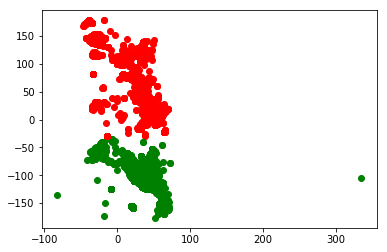

In [47]:
plt.show()